# Microsoft stock price
## ARIMA prediction

A ARIMA (seasonal/ nonseasonal Auto-Regressive Integrated Moving Average) prediction and forecast for Microsoft's stock price. This notebook is a modification of [this repo](https://github.com/gmonaci/ARIMA), which nicely presents the methology for the classic international airline passengers data. Futher theory of ARIMA models can be found there and in its references.

### Importing libraries

In [2]:
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Defaults
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 12})
plt.style.use('seaborn')

### Loading msft stock data

In [14]:
msft = pd.read_csv('data/msft_stock_price_cleaned.csv',
                           index_col = 0)
msft['date']=pd.to_datetime(msft_stock_df['date'], format='%Y-%m-%d')
#msft_stock_df = msft_stock_df.set_index('date')
#msft_stock_df = msft_stock_df[::-1].reset_index(drop = True)
msft.head()

,date,close,volume,open,high,low
0,2010-07-14,25.44,72735610,25.50,25.61,25.12
1,2010-07-15,25.51,56913440,25.50,25.59,24.98
2,2010-07-16,24.89,65045360,25.51,25.64,24.88
3,2010-07-19,25.23,37429940,24.96,25.30,24.91
4,2010-07-20,25.48,45486460,24.86,25.48,24.70


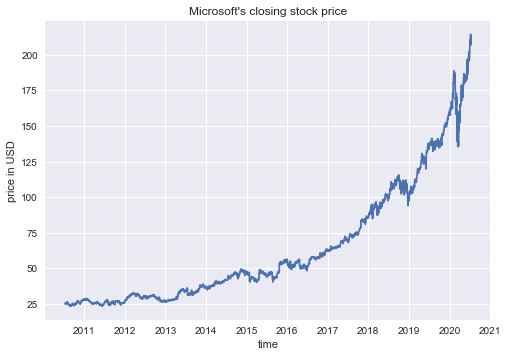

In [15]:
plt.plot('date','close', data = msft)
plt.title('Microsoft\'s closing stock price')
plt.ylabel('price in USD')
plt.xlabel('time')
plt.show()

## Defining the range of ARIMA parameter 
For a grid search we define a range of ARIMA parameter.

In [11]:
# Define the d and q parameters to take any value between 0 and 1
q = d = range(0, 2)
# Define the p parameters to take any value between 0 and 3
p = range(0, 4)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))
print('\nnumber of pdq x seasonal_pdq combinations: {}'.format(len(pdq) **2))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)

number of pdq x seasonal_pdq combinations: 256


## Splitting in train and test data

In [21]:
# 20% of testing data
n_test = int(msft.shape[0] * .2)

train_data = msft[:-n_test]['close']
test_data = msft[-n_test:]['close']

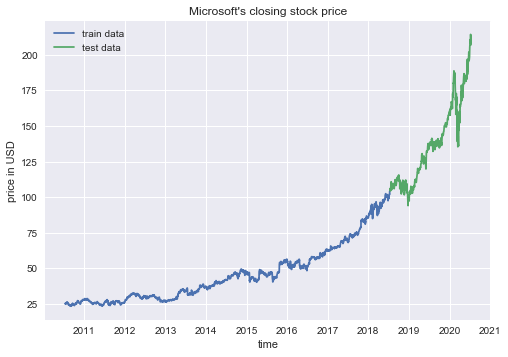

In [23]:
plt.plot(msft.date[:-n_test],train_data, label ='train data')
plt.plot(msft.date[-n_test:],test_data, label = 'test data')
plt.title('Microsoft\'s closing stock price')
plt.ylabel('price in USD')
plt.xlabel('time')
plt.legend()
plt.show()

## With the following a specified model can be tested

In [25]:
mod = sm.tsa.statespace.SARIMAX(train_data,
                                order=(3,0,1),
                                seasonal_order=(3,0,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
results.aic

C:\Users\Asus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


4157.7658291678035

## Finding the best parameters in the range by the smallest AIC by a grid search

In [8]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

AIC = []
SARIMAX_model = []
i = 1
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('{} / 256 : SARIMAX{}x{} - AIC:{:.2f}'.format(i ,param, param_seasonal, results.aic)
                  #, end='\r'
                 )
            i += 1
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

1 / 256 : SARIMAX(0, 0, 0)x(0, 0, 0, 12) - AIC:26817.71
2 / 256 : SARIMAX(0, 0, 0)x(0, 0, 1, 12) - AIC:23618.79
3 / 256 : SARIMAX(0, 0, 0)x(0, 1, 0, 12) - AIC:11232.60
4 / 256 : SARIMAX(0, 0, 0)x(0, 1, 1, 12) - AIC:11187.29
5 / 256 : SARIMAX(0, 0, 0)x(1, 0, 0, 12) - AIC:10960.13
6 / 256 : SARIMAX(0, 0, 0)x(1, 0, 1, 12) - AIC:10903.95
7 / 256 : SARIMAX(0, 0, 0)x(1, 1, 0, 12) - AIC:11191.12
8 / 256 : SARIMAX(0, 0, 0)x(1, 1, 1, 12) - AIC:11188.22
9 / 256 : SARIMAX(0, 0, 0)x(2, 0, 0, 12) - AIC:10863.03
10 / 256 : SARIMAX(0, 0, 0)x(2, 0, 1, 12) - AIC:10863.06
11 / 256 : SARIMAX(0, 0, 0)x(2, 1, 0, 12) - AIC:11117.99
12 / 256 : SARIMAX(0, 0, 0)x(2, 1, 1, 12) - AIC:10869.42
13 / 256 : SARIMAX(0, 0, 0)x(3, 0, 0, 12) - AIC:10813.87
14 / 256 : SARIMAX(0, 0, 0)x(3, 0, 1, 12) - AIC:10815.56
15 / 256 : SARIMAX(0, 0, 0)x(3, 1, 0, 12) - AIC:11018.63
16 / 256 : SARIMAX(0, 0, 0)x(3, 1, 1, 12) - AIC:10816.45
17 / 256 : SARIMAX(0, 0, 1)x(0, 0, 0, 12) - AIC:23551.94
18 / 256 : SARIMAX(0, 0, 1)x(0, 0, 1, 12

147 / 256 : SARIMAX(2, 0, 1)x(0, 1, 0, 12) - AIC:7903.38
148 / 256 : SARIMAX(2, 0, 1)x(0, 1, 1, 12) - AIC:6390.94
149 / 256 : SARIMAX(2, 0, 1)x(1, 0, 0, 12) - AIC:6416.60
150 / 256 : SARIMAX(2, 0, 1)x(1, 0, 1, 12) - AIC:6396.49
151 / 256 : SARIMAX(2, 0, 1)x(1, 1, 0, 12) - AIC:7294.21
152 / 256 : SARIMAX(2, 0, 1)x(1, 1, 1, 12) - AIC:6422.25
153 / 256 : SARIMAX(2, 0, 1)x(2, 0, 0, 12) - AIC:6374.38
154 / 256 : SARIMAX(2, 0, 1)x(2, 0, 1, 12) - AIC:6519.35
155 / 256 : SARIMAX(2, 0, 1)x(2, 1, 0, 12) - AIC:7014.26
156 / 256 : SARIMAX(2, 0, 1)x(2, 1, 1, 12) - AIC:6377.07
157 / 256 : SARIMAX(2, 0, 1)x(3, 0, 0, 12) - AIC:6511.27
158 / 256 : SARIMAX(2, 0, 1)x(3, 0, 1, 12) - AIC:6532.51
159 / 256 : SARIMAX(2, 0, 1)x(3, 1, 0, 12) - AIC:6824.33
160 / 256 : SARIMAX(2, 0, 1)x(3, 1, 1, 12) - AIC:6356.03
161 / 256 : SARIMAX(2, 1, 0)x(0, 0, 0, 12) - AIC:6410.49
162 / 256 : SARIMAX(2, 1, 0)x(0, 0, 1, 12) - AIC:6392.39
163 / 256 : SARIMAX(2, 1, 0)x(0, 1, 0, 12) - AIC:8008.85
164 / 256 : SARIMAX(2, 1, 0)x(0

## Finding the model with the smallest AIC and fit it

In [9]:
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

The smallest AIC is 6332.091235169297 for model SARIMAX(3, 0, 1)x(3, 0, 1, 12)


In [10]:
# Let's fit this model
mod = sm.tsa.statespace.SARIMAX(train_data,
                                order=SARIMAX_model[AIC.index(min(AIC))][0],
                                seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

## Showing diagnostics

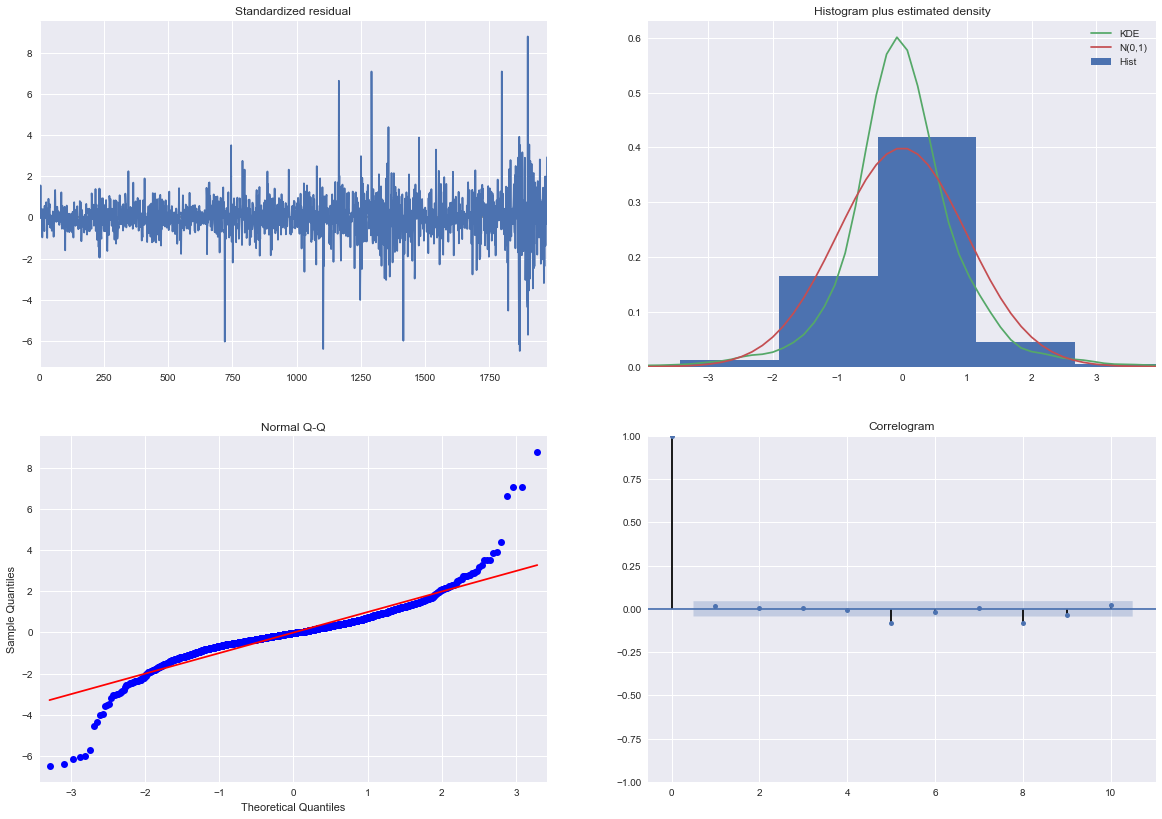

In [26]:
results.plot_diagnostics(figsize=(20, 14))
plt.show()

## Different ways of prediction / forecasting

In [59]:
n_pred = n_test
start_pred = msft.shape[0] - n_test
end_pred = msft.shape[0] - 1

In [60]:
pred0 = results.get_prediction(start_pred, end_pred, dynamic=False)
pred0_ci = pred0.conf_int()

In [61]:
pred1 = results.get_prediction(start_pred, end_pred, dynamic=True)
pred1_ci = pred1.conf_int()

In [109]:
n_future = 100
pred2 = results.get_forecast(n_test + n_future)
pred2_ci = pred2.conf_int()

## By the following all predictions are the same

In [88]:
print(np.mean(pred0.predicted_mean == pred1.predicted_mean),
np.mean(pred0.predicted_mean == pred2.predicted_mean[:-n_future]))

1.0 1.0


## Plotting the results

In [96]:
#from datetime.datetime import combine
import datetime
future_ran = pd.bdate_range(start = msft.date.iloc[-1], 
                            end = '2020-11-29')

all_time = np.concatenate((msft.date[-n_pred:],  future_ran))
len(future_ran)

100

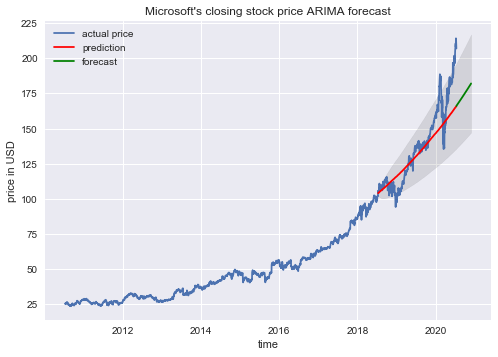

In [112]:
fig, ax = plt.subplots()

plt.plot('date', 'close', data = msft, label = 'actual price')


plt.plot(msft.date[-n_pred:], pred2.predicted_mean[:n_pred], label='prediction', color = 'r')
plt.plot(future_ran, pred2.predicted_mean[n_pred:], label='forecast', color ='g')

plt.title('Microsoft\'s closing stock price\'s ARIMA forecast')
plt.ylabel('price in USD')
plt.xlabel('time')
plt.legend()
ax.fill_between(all_time, np.array(pred2_ci.iloc[:, 0]), np.array(pred2_ci.iloc[:, 1]), color='k', alpha=.1)
plt.show()


## Evaluation

In [121]:
from sklearn.metrics import mean_squared_error

close_true = np.array(msft.close[-n_pred:])
close_prediction = pred0.predicted_mean

rmse = np.sqrt(mean_squared_error(close_true, 
                                  close_prediction))
mape = np.mean(np.abs(close_true - close_prediction.T) 
               / close_true)

print('------- Evaluation for the prediction -------')
print('Squareroot of the mean squared error:   {:.2f}'.format(rmse))
print('Mean absolute percentage error:         {:.2f}%'.format(mape * 100))

------- Evaluation for the prediction -------
Squareroot of the mean squared error:   13.46
Mean absolute percentage error:         6.33%


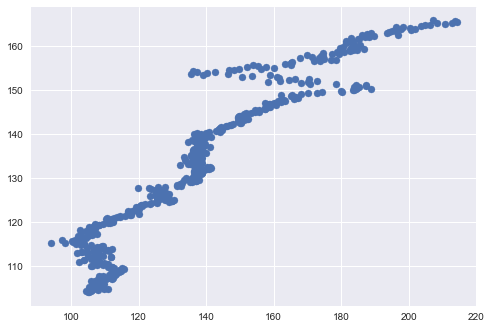

In [117]:
# Scatter plot
plt.scatter(msft.close[-n_pred:], pred0.predicted_mean)